In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Domain parameters
Lx = 1.0  # Length of the domain in x direction (m)
Ly = 0.1  # Height of the domain in y direction (m)
nx = 50   # Number of grid points in x direction
ny = 20   # Number of grid points in y direction
U_inf = 1.0  # Free-stream velocity (m/s)
nu = 1.0e-6  # Kinematic viscosity (m^2/s)

# Discretization parameters
dx = Lx / (nx - 1)  # Grid spacing in x direction
dy = Ly / (ny - 1)  # Grid spacing in y direction

# Initialize velocity fields
u = np.zeros((nx, ny))  # x-velocity
v = np.zeros((nx, ny))  # y-velocity

# Function to apply the TDMA solver
def TDMA(a, b, c, d):
    n = len(b)
    # Modify the coefficients
    for i in range(1, n):
        m = a[i-1] / b[i-1]
        b[i] -= m * c[i-1]
        d[i] -= m * d[i-1]

    # Back substitution
    x = np.zeros(n)
    x[-1] = d[-1] / b[-1]
    for i in range(n - 2, -1, -1):
        x[i] = (d[i] - c[i] * x[i + 1]) / b[i]
    return x

# Time-stepping loop (x marching)
for i in range(1, nx):
    # Update the v velocity using the continuity equation
    # Setting up the system for v velocity
    b_v = np.zeros(ny)  # Right-hand side for v
    A_v = np.zeros((ny, ny))  # Coefficient matrix for v

    for j in range(1, ny-1):
        A_v[j, j-1] = -dy / (2 * dx)  # Left neighbor coefficient
        A_v[j, j] = 1  # Diagonal coefficient
        A_v[j, j+1] = dy / (2 * dx)  # Right neighbor coefficient
        b_v[j] = (u[i, j] - u[i-1, j])  # Continuity equation

    # Boundary conditions for v
    A_v[0, 0] = 1  # No penetration at the wall (y=0)
    b_v[0] = 0
    A_v[-1, -1] = 1  # No penetration at the top (y=Ly)
    b_v[-1] = 0

    # Solve for v using TDMA
    v[i, :] = TDMA(A_v[:, 0], np.diag(A_v), A_v[:, 1], b_v)

    # Update the u velocity using the x-momentum equation
    # Setting up the system for u velocity
    b_u = np.zeros(ny)  # Right-hand side for u
    A_u = np.zeros((ny, ny))  # Coefficient matrix for u

    for j in range(1, ny-1):
        A_u[j, j-1] = -nu / dy**2  # Second derivative term
        A_u[j, j] = 1 / dx - (v[i, j] / (2 * dy))  # Central difference term
        A_u[j, j+1] = nu / dy**2  # Second derivative term
        b_u[j] = u[i-1, j] / dx  # Previous time step contribution

    # Boundary conditions for u
    A_u[0, 0] = 1  # No-slip condition at the wall (y=0)
    b_u[0] = 0
    A_u[-1, -1] = 1  # Inlet condition at the top (y=Ly)
    b_u[-1] = U_inf

    # Solve for u using TDMA
    u[i, :] = TDMA(A_u[:, 0], np.diag(A_u), A_u[:, 1], b_u)

# Visualization of results
y = np.linspace(0, Ly, ny)
x = np.linspace(0, Lx, nx)

plt.figure(figsize=(10, 6))
for i in range(0, nx, 10):
    plt.plot(u[i, :], y, label=f'x = {x[i]:.2f} m')
plt.xlabel('Velocity (u)')
plt.ylabel('Height (y)')
plt.title('Velocity Profile in the Boundary Layer')
plt.legend()
plt.grid()
plt.show()


ValueError: assignment destination is read-only

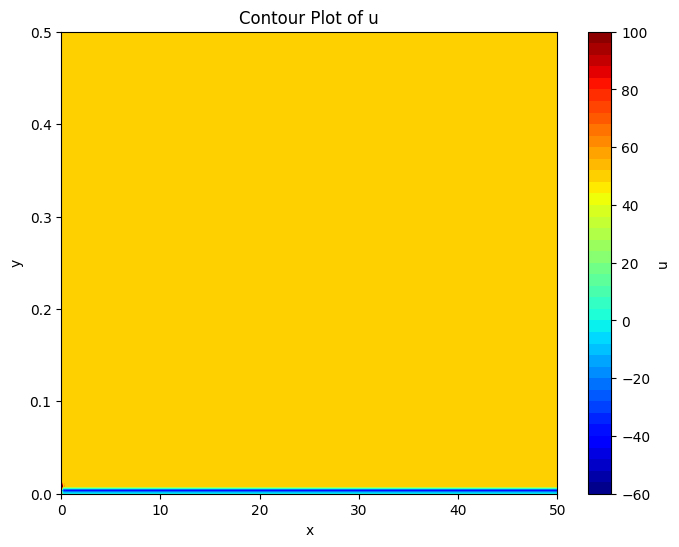

In [16]:
import numpy as np
import matplotlib.pyplot as plt

Lx, Ly = 50.0, 1.0
Re = 1e4
U_inf = 50.0
nx, ny = 500, 250
nu = (U_inf * Lx) / Re
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
u = np.ones((nx, ny),dtype=float)  * U_inf
v = np.zeros((nx, ny), dtype=float)
# Discretization parameters
dx = Lx / (nx - 1)  # Grid spacing in x direction
dy = Ly / (ny - 1)  # Grid spacing in y direction


# Function to apply the TDMA solver
def TDMA(a, b, c, d):
    n = len(b)
    # Modify the coefficients
    for i in range(1, n):
        m = a[i-1] / b[i-1]
        b[i] -= m * c[i-1]
        d[i] -= m * d[i-1]

    # Back substitution
    x = np.zeros(n)
    x[-1] = d[-1] / b[-1]
    for i in range(n - 2, -1, -1):
        x[i] = (d[i] - c[i] * x[i + 1]) / b[i]
    return x

# Time-stepping loop (x marching)
for i in range(1, nx):
    # Update the v velocity using the continuity equation
    # Setting up the system for v velocity
    b_v = np.zeros(ny)  # Right-hand side for v
    A_v = np.zeros((ny, ny))  # Coefficient matrix for v

    for j in range(1, ny-1):
        A_v[j, j-1] = -dy / (2 * dx)  # Left neighbor coefficient
        A_v[j, j] = 1  # Diagonal coefficient
        A_v[j, j+1] = dy / (2 * dx)  # Right neighbor coefficient
        b_v[j] = (u[i, j] - u[i-1, j])  # Continuity equation

    # Boundary conditions for v
    A_v[0, 0] = 1  # No penetration at the wall (y=0)
    b_v[0] = 0
    A_v[-1, -1] = 1  # No penetration at the top (y=Ly)
    b_v[-1] = 0

    # Solve for v using TDMA
    v[i, :] = TDMA(A_v[:, 0].copy(), np.diag(A_v).copy(), A_v[:, 1].copy(), b_v)

    # Update the u velocity using the x-momentum equation
    # Setting up the system for u velocity
    b_u = np.zeros(ny)  # Right-hand side for u
    A_u = np.zeros((ny, ny))  # Coefficient matrix for u

    for j in range(1, ny-1):
        A_u[j, j-1] = -nu / dy**2  # Second derivative term
        A_u[j, j] = 1 / dx - (v[i, j] / (2 * dy))  # Central difference term
        A_u[j, j+1] = nu / dy**2  # Second derivative term
        b_u[j] = u[i-1, j] / dx  # Previous time step contribution

    # Boundary conditions for u
    A_u[0, 0] = 1  # No-slip condition at the wall (y=0)
    b_u[0] = 0
    A_u[-1, -1] = 1 # Inlet condition at the top (y=Ly)
    b_u[-1] = U_inf

    # Solve for u using TDMA
    u[i, :] = TDMA(A_u[:, 0].copy(), np.diag(A_u).copy(), A_u[:, 1].copy(), b_u)

# Visualization of results
y = np.linspace(0, Ly, ny)
x = np.linspace(0, Lx, nx)
plt.figure(figsize=(8, 6))
plt.contourf(x,y, u.T, levels=50, cmap='jet')
plt.colorbar(label="u")
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0, .5)
plt.title(f'Contour Plot of u')
plt.show()
